In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
# 计算每一次层网络
def add_layer(inputs, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_b = tf.matmul(inputs, weights) + biases
    return wx_b if activation_function is None else activation_function(wx_b,)

xs = tf.placeholder(tf.float32, [None, 28*28])
ys = tf.placeholder(tf.float32, [None, 10])


def compute_accuracy(v_xs, v_ys):
    global prediction
#     feed入测试集数据
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})

def model_(learning_rate,activation_function=None):
    layer1 = add_layer(xs, 784, 50, activation_function = activation_function)
    layer2 = add_layer(layer1, 50, 50, activation_function = activation_function)
    layer3 = add_layer(layer2, 50, 50, activation_function = activation_function)
    layer4 = add_layer(layer3, 50, 50, activation_function = activation_function)
    prediction = add_layer(layer4, 50, 10, activation_function = tf.nn.softmax)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                  reduction_indices=[1]))

    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    return (layer1, prediction, train_step)

In [12]:
activation_functions = ['tf.nn.tanh','tf.nn.sigmoid','tf.nn.relu']
models = {}
for i in activation_functions:
    layer1, prediction, train_step = model_(0.05,i)
    print('function:',i)
    with tf.Session() as sess:
    #     初始化我们创建的变量
        sess.run(tf.global_variables_initializer())
        steps = []
        accuracy_s = []
        for i in range(5000):
            batch_xs, batch_ys = mnist.train.next_batch(200)
    #         训练模型 
            sess.run(layer1,  feed_dict = {xs: batch_xs, ys: batch_ys})

            sess.run(train_step, feed_dict = {xs: batch_xs, ys:batch_ys})
            if i % 100 ==0:
                accuracy = compute_accuracy(mnist.test.images, mnist.test.labels)
                accuracy_s.append(accuracy)
                steps.append(i)
                print ("step:",i,", ",accuracy)
    models[str(i)] = {'step':steps,'accuracy':accuracy_s}

TypeError: 'str' object is not callable

In [ ]:
for i in activation_functions:
    plt.plot(models[str(i)]['steps'],models[str(i)]['accuracy_s'],label=str(i))
plt.ylabel('accuracy')
plt.xlabel('per 1000 steps)')
legend = plt.legend(loc='upper center',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [35]:
# 一次batch的数据 200条
batch_xs.shape, batch_ys.shape

((200, 784), (200, 10))

In [54]:
batch_ys[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

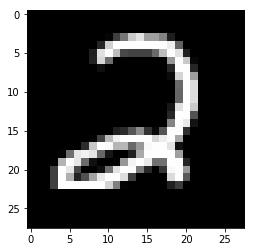

In [101]:
index = 9
plt.imshow(batch_xs[index].reshape(28,28))

In [79]:
image.shape

(249, 354)